In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = tf.placeholder(tf.float32, [None, 5])
w = tf.Variable(tf.zeros([5, 1]))
y = tf.matmul(x, w)
t = tf.placeholder(tf.float32,  [None, 1])
loss = tf.reduce_sum(tf.square(y - t))

train_step = tf.train.AdamOptimizer().minimize(loss)

In [2]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [3]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month**n

In [8]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x: train_x, t: train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x: train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 20.815216
Step: 20000, Loss: 20.120344
Step: 30000, Loss: 19.532700
Step: 40000, Loss: 19.500206
Step: 50000, Loss: 18.511400
Step: 60000, Loss: 18.063858
Step: 70000, Loss: 17.583269
Step: 80000, Loss: 37.277138
Step: 90000, Loss: 18.491034
Step: 100000, Loss: 16.465191


In [9]:
w_val = sess.run(w)
print (w_val)

[[ 6.10435295]
 [-4.04009485]
 [ 2.50994325]
 [-0.28162572]
 [ 0.00834597]]


In [10]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

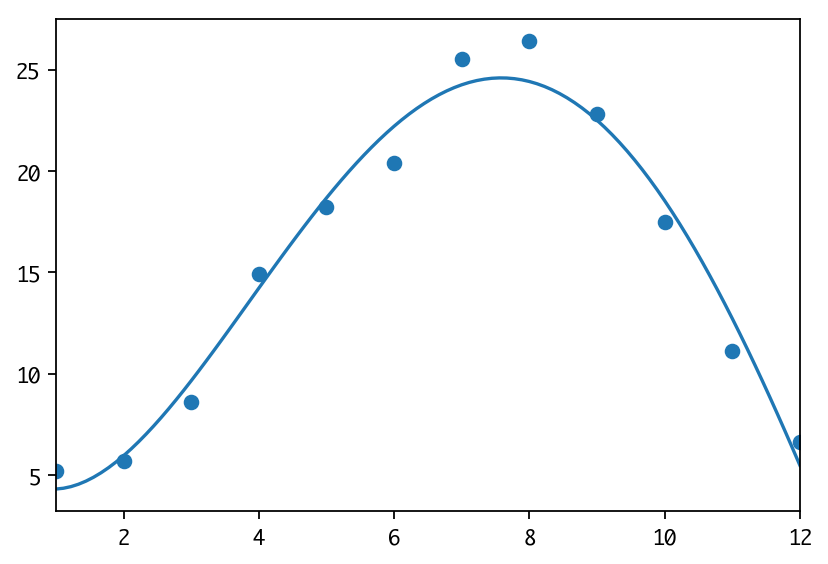

In [11]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
linex = np.linspace(1, 12, 100)
liney = predict(linex)
subplot.plot(linex, liney)